# Тема: Искусственный нейрон и однослойный перцептрон

Искусственный нейрон — это математическая модель биологического нейрона.

Он получает на вход несколько значений x1, x2, ..., xn,
умножает их на соответствующие веса w1, w2, ..., wn,
добавляет смещение (bias) и пропускает результат через функцию активации.

Формула работы нейрона:
y = f(w1*x1 + w2*x2 + b)

где:
  - w — веса,
  - b — смещение (bias),
  - f — функция активации (например, сигмоида, ReLU, tanh).

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов.

Каждый нейрон принимает на вход несколько признаков и выдает один выход.

Если нейронов несколько, то их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи линейной классификации — то есть разделять данные, которые можно отделить прямой или гиперплоскостью.

Однако он не может решить задачи, где классы разделяются нелинейно (например, логическую операцию XOR).

Правило обучения перцептрона:

w = w + η * (y_true - y_pred) * x
где:
  - η — скорость обучения,
  - y_true — истинное значение,
  - y_pred — предсказанное.

Таким образом, перцептрон корректирует веса, если предсказание неверное, постепенно улучшая свою способность различать классы.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def neuron_output(X, w, b, activation):
    z = np.dot(X, w) + b
    return activation(z)

**Реализация функций активации**

In [90]:
activation_functions = {
    'Identity': lambda x: x, 
    'Binary step': lambda x: np.where(x >= 0, 1, 0),  
    'Sigmoid': lambda x: 1 / (1 + np.exp(-x)), 
    'tanh': lambda x: np.tanh(x), 
    'arctan': lambda x: np.arctan(x), 
    'ReLU': lambda x: np.maximum(0, x), 
    'Softsign': lambda x: x / (1 + np.abs(x)), 
    'Softplus': lambda x: np.log(1 + np.exp(x)), 
    'Leaky ReLU': lambda x: np.where(x >= 0, x, x * 0.01)
}

In [91]:
SIZE = 500
SEED = 45

In [92]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0]*SIZE + [1]*SIZE)

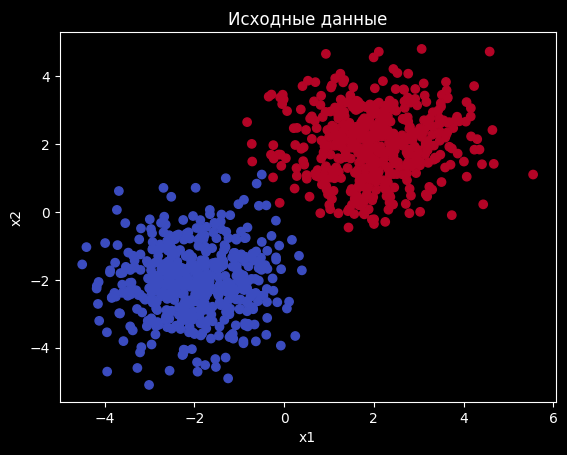

In [93]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [94]:
def fit(X, w, b, lr, epoch, func_name, verbose=False):
    losses = []

    for epoch_ in range(epoch):
        for i in range(len(X)):
            y_pred = neuron_output(X[i], w, b, activation_functions[func_name])
            y_pred = (y_pred > 0.5).astype(int) # Дополнительная бинаризация
            error = y[i] - y_pred
            w += lr * error * X[i]
            b += lr * error
        y_pred = neuron_output(X, w, b, activation_functions[func_name])
        y_pred = (y_pred > 0.5).astype(int)
        acc = (y_pred == y).mean()
        losses.append(1 - acc)
        if verbose:
            print(f"Эпоха {epoch_ + 1}/{epoch} — точность: {acc:.4f}")

    return w, b, losses

In [95]:
def plot_info(w, b, func_name, losses, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b, activation_functions[func_name])
    Z = (Z > 0.5).astype(int) # Дополнительная бинаризация
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(f'Граница решений однослойного перцептрона ({func_name})')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epoch + 1), [1 - l for l in losses], marker='o')
    plt.title(f'Изменение точности по эпохам обучения ({func_name})')
    plt.xlabel('Эпоха')
    plt.ylabel('Точность')
    plt.ylim(np.min([1 - l for l in losses]) - 0.05, 1.05)

    plt.show()

In [96]:
LEARNING_RATE = 0.01
EPOCHS = 10

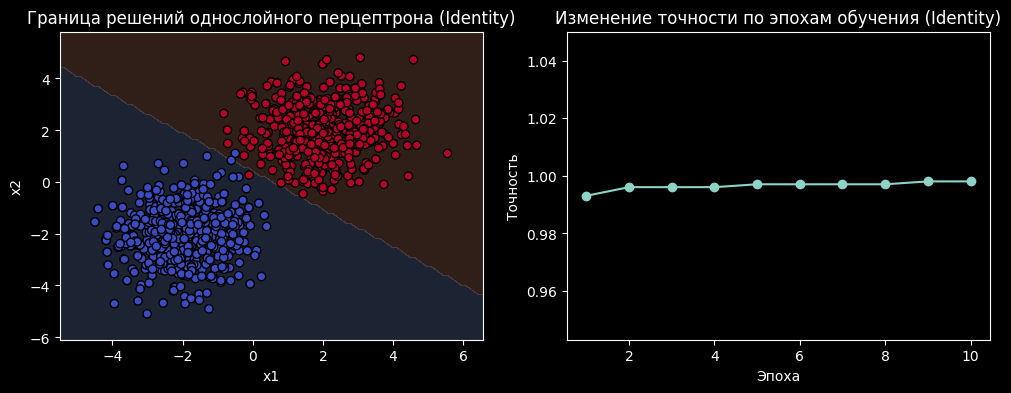

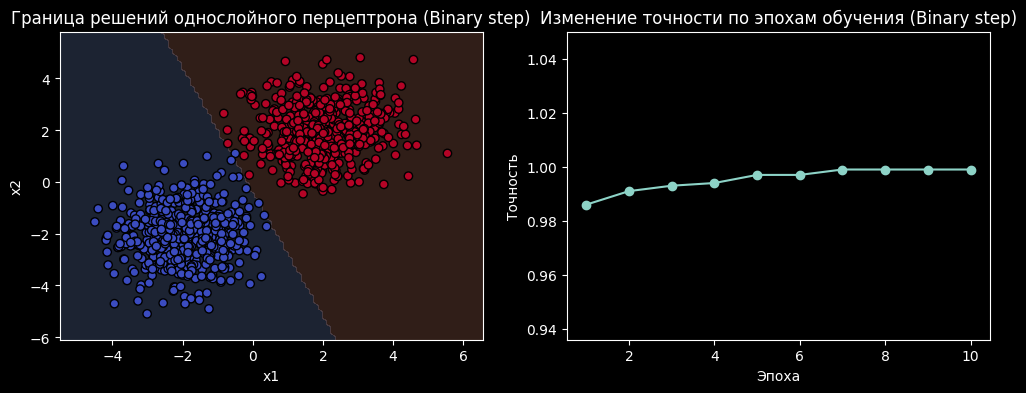

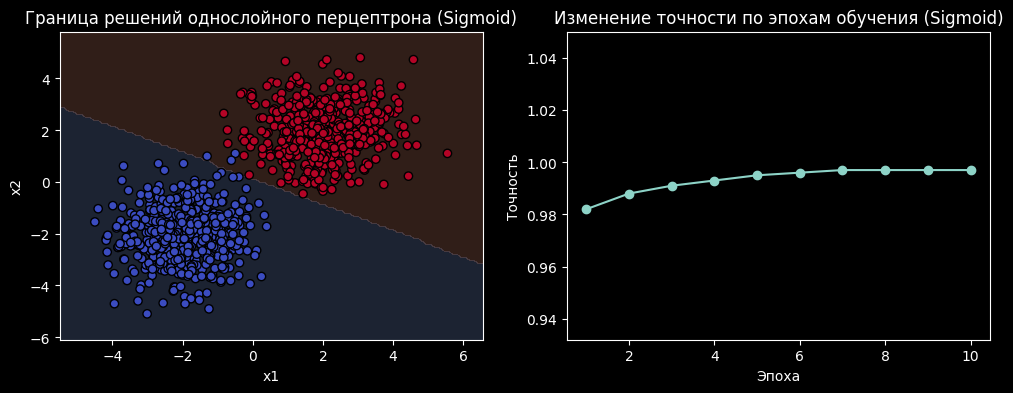

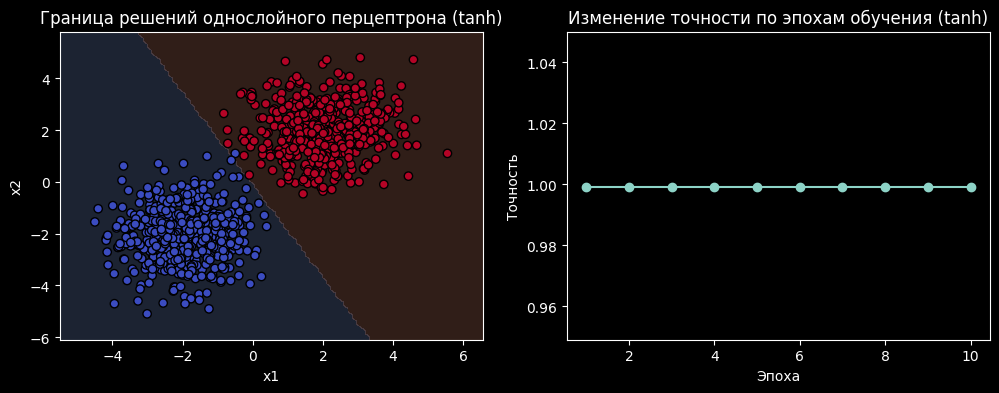

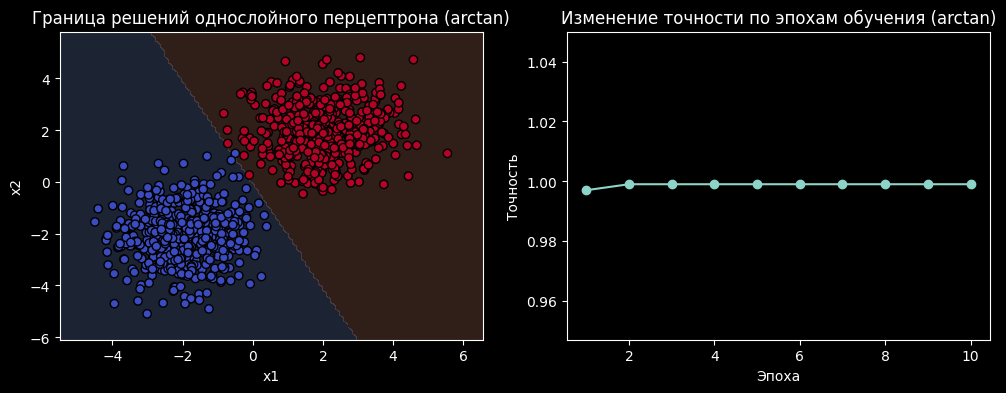

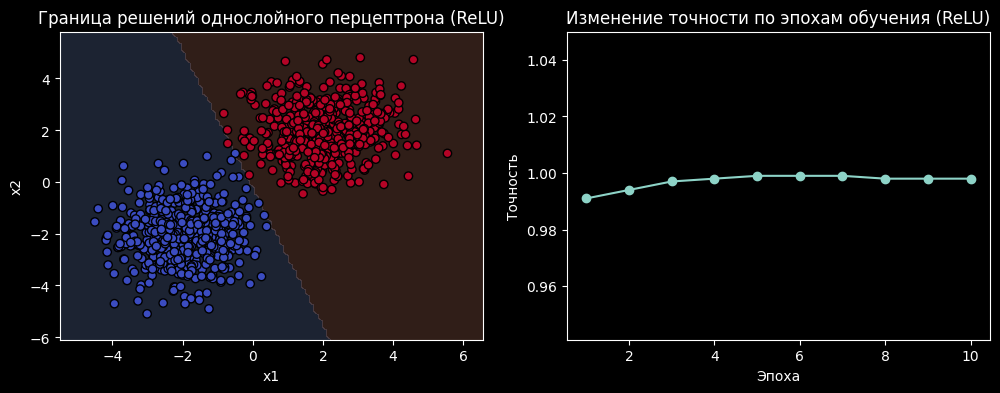

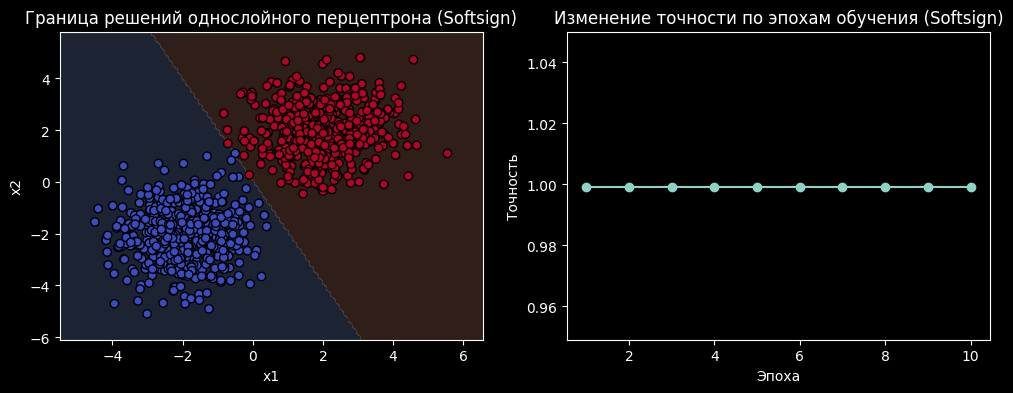

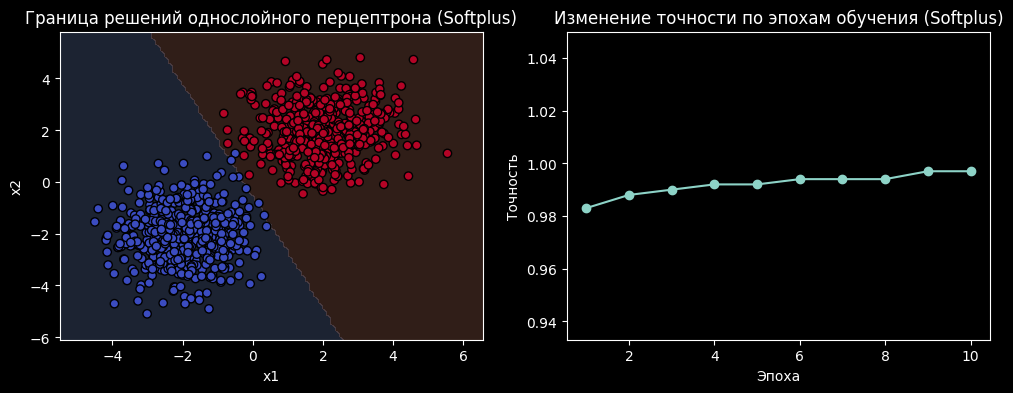

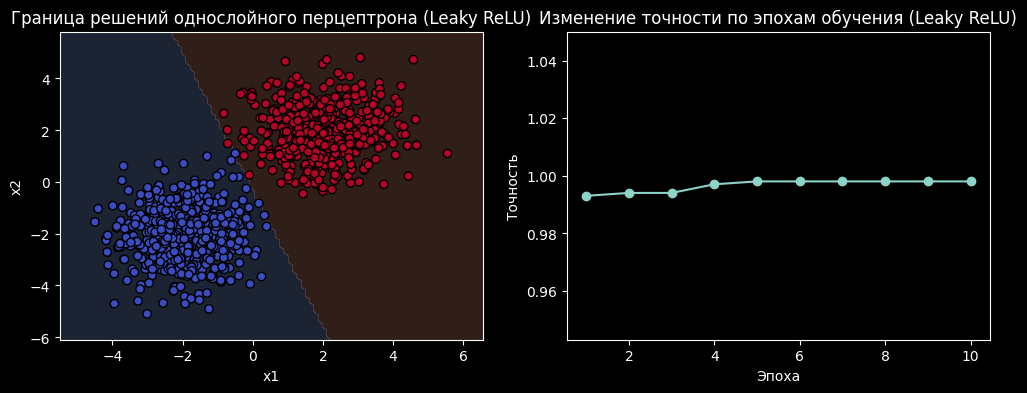

In [97]:
metrics = {}

for func_name in activation_functions.keys():
    w = np.random.randn(2)
    b = 1.0

    w, b, losses = fit(X, w, b, LEARNING_RATE, EPOCHS, func_name)

    plot_info(w, b, func_name, losses, EPOCHS)

    metrics[func_name] = 1 - losses[-1]

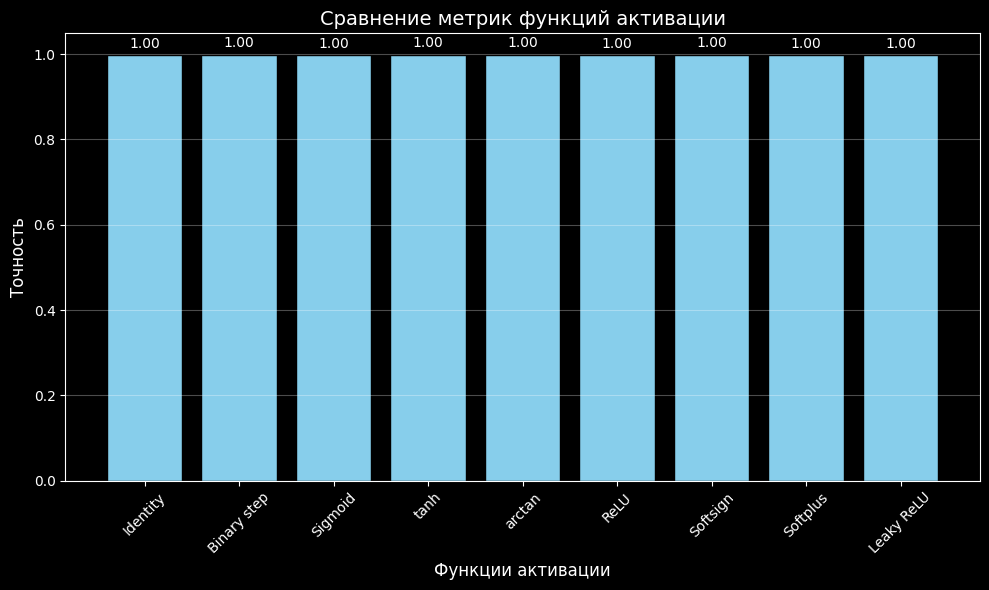

In [98]:
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue', edgecolor='black')

plt.title('Сравнение метрик функций активации', fontsize=14)
plt.xlabel('Функции активации', fontsize=12)
plt.ylabel('Точность', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, (func, value) in enumerate(metrics.items()):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Функции активации кроме ступенчатой выдают непрерывный диапазон, а значит без дополнительной бинаризации, например через пороговое значение, не подходят для задачи классификации. 
С приведением к бинарному виду все функции обеспечивают сходимость для данной задачи. 

1. Что делает функция активации в искусственном нейроне2. Чем отличается искусственный нейрон от однослойного перцептрона?
3. Какое правило используется для обучения перцептрона?
4. Почему однослойный перцептрон не может решить задачу XOR?
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?


1. Фунция активации ограничивает выходной диапазон нейрона и добавляет нелинейность, позволяя решать более сложные задачи. Искуственный нейрон - один вычислительный элемент,который скалаярно умножает входной вектор на вектор весов, добавляет смещение и применяет функцию активации, перцептрон- нейронная сеть составленная из звязанных нейронов.
2. Обучение однослойного перцептрона осуществляется с помощью градиентного спуска
3. Задача XOR не является линейно разделимой, а однослойный перцептрон способен проводить только гиперплоскость. 
4. Верхняя граница выхода станет неограниченной, рост станет не гладким, нейроны выдающие отрицательные значения перестанут играть роль. 